In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import itertools as it

In [2]:
data = pd.read_csv('Sexuality_in_video_games_unedited.csv')

In [3]:
data

,Timestamp,Your Gender,Your Sexual Orientation,Your age,What country are You from?,How often do You play computer games,And for how long do Your gaming sessions usually last,Your favourite video game genre,Your favourite game(May write several),What other interests do You hold(You can choose multiple and write any others in Other),Your overall view on seeing sexual themes in the game(What is you reaction on seeing sexual themes in a game),Your view on sexualisation of the character design(Your reaction on seeing (overly)sexual character design),Any specific things that you usually LIKE in character designs,Any specific things that you usually DISLIKE in character designs,Your view on sexual sub-context in video games- themes around sex and similar,"If you dislike the (over)use of sexual sub-content, would you be okay if it's explained logically, tied to the story(And-Or if it exists for more reasons than just for marketing and-or similar)",Are you okay with LGBT+ characters in video games,Anything to add to the theme? Your personal thoughts.
0,04/01/2021 18:22:52,Prefer not to say,confused,27-35,Latvia,Every day,5-8 hours,Multiplayer RPGs,"WoW, Lol, Tekken","Books(Non asian), Tabletop games(just the basi...",Sometimes positive,4,NaN,Oversized breasts,3,Yes,"Yes, but only if explained logically and-or ex...",NaN
1,04/01/2021 18:43:27,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Immersive Sims,"Deus Ex: Human Revolution, Prey (2017), Mass E...","Books(Non asian), Films and TV series",Sometimes positive,4,When it makes sense in a given setting,When there is no sense or the explanation is w...,4,Yes,"Yes, but only if explained logically and-or ex...",There are moments when erotic scenes are just ...
2,04/01/2021 18:43:43,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Singleplayer RPGs,Red Dead Redemption 2,"Books(Non asian), Films and TV series, Manga",Mostly positive,7,NaN,NaN,5,Yes,"Yes, but only if explained logically and-or ex...",NaN
3,04/01/2021 18:52:43,Male,Heterosexual,27-35,Russian Federation,Every day,5-8 hours,Don't have favorite,"Ace Combat 7, SpecOps The Line, Deus Ex Human ...","Books(Non asian), Tabletop RPGs(D&D and simila...",Neutral,4,marks of their mind characteristics,"Extreme sexualisation, too bright colors, hype...",4,Yes,Maybe/Neutral,NaN
4,04/01/2021 19:04:46,Male,Heterosexual,21-26,Latvia,Ranges from every day to several times a week.,5-8 hours,Action,Devil May Cry; Dark Souls; Tekken; Escape From...,"Tabletop games(just the basic ones), Films and...",Sometimes positive,4,When the design of the character serves to tel...,Dislike when the creative process of designing...,4,Yes,If that type of content feels forced on then n...,As the LGBT+ community has gained more tractio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,05/01/2021 11:37:11,Male,Heterosexual,21-26,US,Several times a week,0-4 hours,Multiplayer RPGs,"Halo, need for speed: underground, overwatch","Books(Non asian), Films and TV series, Anime",Sometimes negative,3,NaN,NaN,4,Yes,"Yes, in any way they appear there",NaN
243,05/01/2021 11:37:39,Male,Heterosexual,More than 35,Germany,Several times a week,0-4 hours,Action,"Celeste, Doom, Super Mario Galaxy, Firewatch, ...","Books(Non asian), Tabletop games(just the basi...",Neutral,2,I like pretty faces and generally attractive (...,"exaggerated boobs, unrealisticly skimpy outfit...",5,"Maybe, but if it's nonsense like Quiet's outfi...","Yes, in any way they appear there","I like playing games with attractive people, b..."
244,05/01/2021 11:43:50,Female,Heterosexual,27-35,USA,Several times a week,0-4 hours,Singleplayer RPGs,Skyrim,"Books(Non asian), Films and TV series",Neutral,2,NaN,"Sexualized female characters, non sexualized m...",4,It is too overdone to be ok with context,"Yes, in any way they appear there",NaN
245,05/01/2021 11:45:41,Male,Heterosexual,Younger than 16,NaN,Several times a week,0-4 hours,Simulators,"Democracy 4, Ci

In [4]:
data.columns = ['date', 'Gender', 'Sexual_orientation', 
                'Age_group','Country','Regularity_of_gaming',
                'Session_length','Genre', 'Favourite_game','Other_interests',
               'View_on_sexuality','View_on_sexualisation','Design_preferences',
               'Design_issues','View_on_sexual_sub_context','bruh','LGBT_representation', 'extras']
data

,date,Gender,Sexual_orientation,Age_group,Country,Regularity_of_gaming,Session_length,Genre,Favourite_game,Other_interests,View_on_sexuality,View_on_sexualisation,Design_preferences,Design_issues,View_on_sexual_sub_context,bruh,LGBT_representation,extras
0,04/01/2021 18:22:52,Prefer not to say,confused,27-35,Latvia,Every day,5-8 hours,Multiplayer RPGs,"WoW, Lol, Tekken","Books(Non asian), Tabletop games(just the basi...",Sometimes positive,4,NaN,Oversized breasts,3,Yes,"Yes, but only if explained logically and-or ex...",NaN
1,04/01/2021 18:43:27,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Immersive Sims,"Deus Ex: Human Revolution, Prey (2017), Mass E...","Books(Non asian), Films and TV series",Sometimes positive,4,When it makes sense in a given setting,When there is no sense or the explanation is w...,4,Yes,"Yes, but only if explained logically and-or ex...",There are moments when erotic scenes are just ...
2,04/01/2021 18:43:43,Male,Heterosexual,21-26,Russia,Several times a week,0-4 hours,Singleplayer RPGs,Red Dead Redemption 2,"Books(Non asian), Films and TV series, Manga",Mostly positive,7,NaN,NaN,5,Yes,"Yes, but only if explained logically and-or ex...",NaN
3,04/01/2021 18:52:43,Male,Heterosexual,27-35,Russian Federation,Every day,5-8 hours,Don't have favorite,"Ace Combat 7, SpecOps The Line, Deus Ex Human ...","Books(Non asian), Tabletop RPGs(D&D and simila...",Neutral,4,marks of their mind characteristics,"Extreme sexualisation, too bright colors, hype...",4,Yes,Maybe/Neutral,NaN
4,04/01/2021 19:04:46,Male,Heterosexual,21-26,Latvia,Ranges from every day to several times a week.,5-8 hours,Action,Devil May Cry; Dark Souls; Tekken; Escape From...,"Tabletop games(just the basic ones), Films and...",Sometimes positive,4,When the design of the character serves to tel...,Dislike when the creative process of designing...,4,Yes,If that type of content feels forced on then n...,As the LGBT+ community has gained more tractio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,05/01/2021 11:37:11,Male,Heterosexual,21-26,US,Several times a week,0-4 hours,Multiplayer RPGs,"Halo, need for speed: underground, overwatch","Books(Non asian), Films and TV series, Anime",Sometimes negative,3,NaN,NaN,4,Yes,"Yes, in any way they appear there",NaN
243,05/01/2021 11:37:39,Male,Heterosexual,More than 35,Germany,Several times a week,0-4 hours,Action,"Celeste, Doom, Super Mario Galaxy, Firewatch, ...","Books(Non asian), Tabletop games(just the basi...",Neutral,2,I like pretty faces and generally attractive (...,"exaggerated boobs, unrealisticly skimpy outfit...",5,"Maybe, but if it's nonsense like Quiet's outfi...","Yes, in any way they appear there","I like playing games with attractive people, b..."
244,05/01/2021 11:43:50,Female,Heterosexual,27-35,USA,Several times a week,0-4 hours,Singleplayer RPGs,Skyrim,"Books(Non asian), Films and TV series",Neutral,2,NaN,"Sexualized female characters, non sexualized m...",4,It is too overdone to be ok with context,"Yes, in any way they appear there",NaN
245,05/01/2021 11:45:41,Male,Heterosexual,Younger than 16,NaN,Several times a week,0-4 hours,Simulators,"Democracy 4, Cities: Skylines","Books(Non asian), Tabletop games(just the basi...",Neutral,3,NaN,NaN,5,Yes,"Yes, in any way they appear there",NaN


In [5]:
data.Country.value_counts()

USA                65
United States      16
Canada             12
Germany            12
US                  9
                   ..
Spain               1
Singapore           1
india               1
Norway              1
The Netherlands     1
Name: Country, Length: 66, dtype: int64

In [16]:
def US_sort(Country):
    Country = str(Country)
    if Country.lower() == 'usa' or Country.lower() == 'united states ' or Country.lower() == 'murica' or Country.lower() == 'america' or Country.lower() == 'usa ' or  Country.lower() == 'us' or Country.lower() == 'united states' or Country.lower() == 'united states of america' or  Country.lower() == 'u.s.' :
        Country = 'USA'
        return Country
    else:
        return Country

def UK_sort(Country):
    Country = str(Country)
    if Country.lower() == 'uk' or Country.lower() == 'uk ' or  Country.lower() == 'united kingdom' or Country.lower() == 'england' or Country.lower() == 'scotland' or Country.lower() == 'united kingdom ' or Country.lower() == 'england ':
        Country = 'UK'
        return Country
    else:
        return Country
    
def Dutch_sort(Country):
    Country = str(Country)
    if Country.lower() == 'netherlands' or Country.lower() == 'the netherlands' or Country.lower() == 'netherlands ' or Country.lower() == 'the netherlands ':
        Country = 'The Netherlands'
        return Country
    else:
        return Country
    
    
def Canadian_sort(Country):
    Country = str(Country)
    if Country.lower() == 'canada' or Country.lower() == 'canada ':
        Country = 'Canada'
        return Country
    else:
        return Country

def French_sort(Country):
    Country = str(Country)
    if Country.lower() == 'france' or Country.lower() == 'france ':
        Country = 'France'
        return Country
    else:
        return Country
    
def Russian_sort(Country):
    Country = str(Country)
    if Country.lower() == 'russia' or Country.lower() == 'russian federation':
        Country = 'Russia'
        return Country
    else:
        return Country
    
def Oceanic_sort(Country):
    Country = str(Country)
    if Country.lower() == 'australia' or Country.lower() == 'new zealand' or Country.lower() == 'new zeland':
        Country = 'Australia and New Zealand'
        return Country
    else:
        return Country
    
def Mexican_sort(Country):
    Country = str(Country)
    if Country.lower() == 'méxico' or Country.lower() == 'mexico':
        Country = 'Mexico'
        return Country
    else:
        return Country
    
def German_sort(Country):
    if Country.lower() == 'germany' or Country.lower() == 'germany ':
        Country = 'Germany'
        return Country
    else:
        return Country
    
def Scandinavian_sort(Country):
    if Country.lower() == 'latvia' or Country.lower() == 'sweden' or Country.lower() == 'estonia' or Country.lower() == 'norway' or Country.lower() == 'finland':
        Country = 'Scandinavian'
        return Country
    else:
        return Country

def South_american_sort(Country):
    if Country.lower() == 'panama' or Country.lower() == 'panamá' or Country.lower() == 'chile' or Country.lower() == 'venezuela':
        Country = 'South America'
        return Country
    else:
        return Country
    
def Asian_pacific_sort(Country):
    if Country.lower() == 'philippines' or Country.lower() == 'malasia' or Country.lower() == 'singapore ':
        Country = 'Asian Pacific Country'
        return Country
    else:
        return Country
    
    
data.Country = data.Country.apply(US_sort)
data.Country = data.Country.apply(UK_sort)
data.Country = data.Country.apply(Dutch_sort)
data.Country = data.Country.apply(Canadian_sort)
data.Country = data.Country.apply(French_sort)
data.Country = data.Country.apply(Russian_sort)
data.Country = data.Country.apply(Oceanic_sort)
data.Country = data.Country.apply(Mexican_sort)
data.Country = data.Country.apply(German_sort)
data.Country = data.Country.apply(Scandinavian_sort)
data.Country = data.Country.apply(South_american_sort)
data.Country = data.Country.apply(Asian_pacific_sort)
data.Country.value_counts()

USA                          112
UK                            20
Germany                       15
Canada                        13
Australia and New Zealand      9
Scandinavian                   9
Brazil                         8
France                         8
Russia                         6
Poland                         6
The Netherlands                6
South America                  6
Mexico                         4
Austria                        3
Ukraine                        3
Asian Pacific Country          3
Italy                          2
Belgium                        2
nan                            1
hungary                        1
Portugal                       1
Romania                        1
Prefer not to say              1
Spain                          1
ireland                        1
Malaysia                       1
RSA                            1
7u                             1
india                          1
Czech Republic                 1
Name: Coun

In [18]:
country_data = data.Country.value_counts()

ValueError: could not convert string to float: 'Scandinavian'

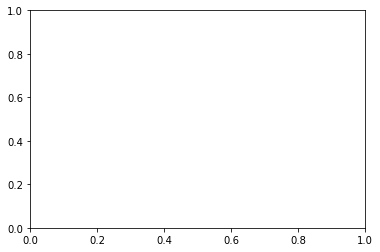

In [29]:
sns.distplot(data['Country'])